<a href="https://colab.research.google.com/github/holandajuan/numerical-methods/blob/main/metodo_bissecao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [90]:
import numpy as np
import matplotlib.pyplot as plt

Implementation of the bisection method

In [78]:
def bisection(f, a, b, epsilon, max_iterations=50):
    """ Exeuta o método da bisseção para achar a raiz de f
        no intevalo [a, b] com nível de precisão episilon. O
        método executa no máximo max_iterations iterações.
        Retorna uma tupla (Erro(True/False), raiz)
    """
    runs = []
    Fa = f(a)
    Fb = f(b)

    # teste para identificar se f muda de sinal no intervalo [a,b]
    if (Fa * Fb > 0):
        print("ERRO : A função deve ter sinais opostos em a e b")
        return (True, None, runs)

    header = ("k".center(4) + "a".center(12) + "f(a)".center(12) +
              "b".center(12) + "f(b)".center(12) + "x".center(12) +
              "f(x)".center(12) + "intervalo".center(12))
    print(header)
    print("-" * len(header))

    intervalX = abs(b - a)
    x = (a + b)/2
    Fx = f(x)

    print(f"{'-':4}{a:12.6f}{Fa:12.6f}{b:12.6f}{Fb:12.6F}"
          f"{x:12.6f}{Fx:12.6f}{intervalX:12.6f}")
    runs.append((0, a, Fa, b, Fb, x, Fx, intervalX))

    if (intervalX <= epsilon):
        return (False, x)

    k = 1
    while (k <= max_iterations):
        # verificação de qual intervalo a função muda de sinal para atualizar o novo intervalo
        if Fa * Fx > 0:
            a = x
        else:
            b = x
            Fb = Fx

        intervalX = abs(b - a)
        x = (a + b)/2
        Fx = f(x)

        print(f"{k:4}{a:12.6f}{Fa:12.6f}{b:12.6f}{Fb:12.6F}"
              f"{x:12.6f}{Fx:12.6f}{intervalX:12.6f}")
        runs.append((k, a, Fa, b, Fb, x, Fx, intervalX))

        if (intervalX <= epsilon):
            return(False, x, runs)

        k+=1

    print("ERRO: Número máximo de iterações atingido")
    return (True, x, runs)

implementation of the function `f(x)`

In [23]:
def f(x):
    return x**3 - 9*x + 3

testing `f(x)`

In [25]:
print(f"f(0): {f(0)}")
print(f"f(1): {f(1)}")

f(0): 3
f(1): -5


finding values ​​for a and b by noting when f changes sign

In [61]:
x = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
# tabela para os valores de x
print(" x | f(x)")
print("-----------")
a = []
b = []
for i,xi in enumerate(x):
    print(f"{xi:2} | {f(xi):5}")
    if (i < len(x)):
        if (f(xi)*f(xi+1) < 0):
            a.append(xi)
            b.append(xi+1)

a, b

 x | f(x)
-----------
-5 |   -77
-4 |   -25
-3 |     3
-2 |    13
-1 |    11
 0 |     3
 1 |    -5
 2 |    -7
 3 |     3
 4 |    31
 5 |    83


([-4, 0, 2], [-3, 1, 3])

setting the parameters for the bisection method and calling the `bisection` function

In [65]:
a1 = a[0]
b1 = b[0]
epsilon = 0.001
max_iterations = 20

In [85]:
(erro1, raiz1, runs1) = bisection(f, a1, b1, epsilon, max_iterations)

 k       a          f(a)         b          f(b)         x          f(x)     intervalo  
----------------------------------------------------------------------------------------
-      -4.000000  -25.000000   -3.000000    3.000000   -3.500000   -8.375000    1.000000
   1   -3.500000  -25.000000   -3.000000    3.000000   -3.250000   -2.078125    0.500000
   2   -3.250000  -25.000000   -3.000000    3.000000   -3.125000    0.607422    0.250000
   3   -3.250000  -25.000000   -3.125000    0.607422   -3.187500   -0.697998    0.125000
   4   -3.187500  -25.000000   -3.125000    0.607422   -3.156250   -0.036041    0.062500
   5   -3.156250  -25.000000   -3.125000    0.607422   -3.140625    0.287991    0.031250
   6   -3.156250  -25.000000   -3.140625    0.287991   -3.148438    0.126551    0.015625
   7   -3.156250  -25.000000   -3.148438    0.126551   -3.152344    0.045399    0.007812
   8   -3.156250  -25.000000   -3.152344    0.045399   -3.154297    0.004715    0.003906
   9   -3.156250  -25

analyzing whether there was an error and the roots

In [83]:
if erro1:
    print("Houve um erro no método da Bisseção")
if raiz1 is not None:
    print(f" Raiz encontrada: {raiz1}")

 Raiz encontrada: -3.15478515625


finding the other roots by substituting the interval [a,b]

In [86]:
a2, b2 = a[1], b[1]
(erro2, raiz2, runs2) = bisection(f, a2, b2, epsilon, max_iterations)
print()
if erro2:
    print("Houve um erro no método da Bisseção")
if raiz2 is not None:
    print(f" Raiz encontrada: {raiz2}")

 k       a          f(a)         b          f(b)         x          f(x)     intervalo  
----------------------------------------------------------------------------------------
-       0.000000    3.000000    1.000000   -5.000000    0.500000   -1.375000    1.000000
   1    0.000000    3.000000    0.500000   -1.375000    0.250000    0.765625    0.500000
   2    0.250000    3.000000    0.500000   -1.375000    0.375000   -0.322266    0.250000
   3    0.250000    3.000000    0.375000   -0.322266    0.312500    0.218018    0.125000
   4    0.312500    3.000000    0.375000   -0.322266    0.343750   -0.053131    0.062500
   5    0.312500    3.000000    0.343750   -0.053131    0.328125    0.082203    0.031250
   6    0.328125    3.000000    0.343750   -0.053131    0.335938    0.014474    0.015625
   7    0.335938    3.000000    0.343750   -0.053131    0.339844   -0.019344    0.007812
   8    0.335938    3.000000    0.339844   -0.019344    0.337891   -0.002439    0.003906
   9    0.335938    3

In [87]:
a3, b3 = a[2], b[2]
(erro3, raiz3, runs3) = bisection(f, a3, b3, epsilon, max_iterations)
print()
if erro3:
    print("Houve um erro no método da Bisseção")
if raiz3 is not None:
    print(f" Raiz encontrada: {raiz3}")

 k       a          f(a)         b          f(b)         x          f(x)     intervalo  
----------------------------------------------------------------------------------------
-       2.000000   -7.000000    3.000000    3.000000    2.500000   -3.875000    1.000000
   1    2.500000   -7.000000    3.000000    3.000000    2.750000   -0.953125    0.500000
   2    2.750000   -7.000000    3.000000    3.000000    2.875000    0.888672    0.250000
   3    2.750000   -7.000000    2.875000    0.888672    2.812500   -0.065186    0.125000
   4    2.812500   -7.000000    2.875000    0.888672    2.843750    0.403412    0.062500
   5    2.812500   -7.000000    2.843750    0.403412    2.828125    0.167042    0.031250
   6    2.812500   -7.000000    2.828125    0.167042    2.820312    0.050412    0.015625
   7    2.812500   -7.000000    2.820312    0.050412    2.816406   -0.007516    0.007812
   8    2.816406   -7.000000    2.820312    0.050412    2.818359    0.021416    0.003906
   9    2.816406   -7

confirming the roots of the function

In [77]:
# Deve ser ≈ 0
print(f(raiz1))
print(f(raiz2))
print(f(raiz3))

-0.005467225448228419
0.0017889043083414435
-0.00028901256155222654


example of graphs for the second root parameters

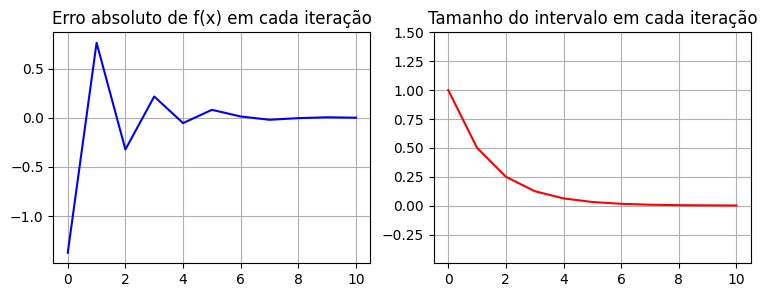

In [124]:
x = []
y = []
z = []

for r in runs2:
    x.append(r[0]) # r[0] -> k
    y.append(r[6]) # r[5] -> Fx
    z.append(r[7]) # r[7] -> intervalX

plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.plot(x, y, 'b-')
plt.grid(True)
plt.title('Erro absoluto de f(x) em cada iteração')

plt.subplot(1,2,2)
plt.plot(x, z, 'r-')
plt.ylim(min(z) - 0.5, max(z)+ 0.5)
plt.grid(True)
plt.title('Tamanho do intervalo em cada iteração')

plt.show();